In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Data Loading

In [3]:
data=pd.read_csv("train.csv")

In [4]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
# Finding the missing values in columns of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data Visualization

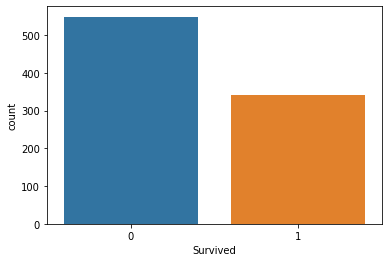

In [6]:
sns.countplot(x="Survived",data=data)

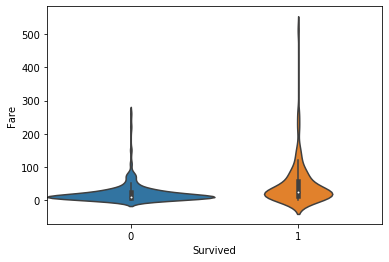

In [7]:
sns.violinplot(x="Survived",y="Fare",data=data,width=1)
# Tells us that the people who paid more fare were more likely to be survived

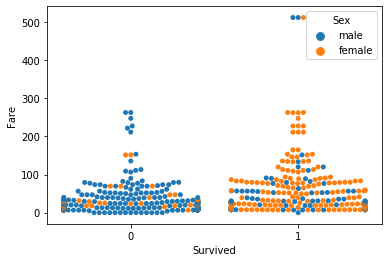

In [8]:
sns.swarmplot(x="Survived",y="Fare",data=data,hue="Sex")
#Female were more likely to be rescued 

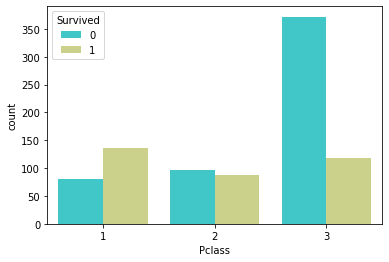

In [9]:
sns.countplot(x="Pclass",data=data,hue="Survived",palette='rainbow')
# the first class people were more likely to survive whereas the death rate was maximum in third class 

## Data Preprocessing

In [10]:
x=data.iloc[:,[2,4,5,6,7,9,11]].values
y=data.iloc[:,1].values

In [11]:
from sklearn.impute import SimpleImputer
# To replace the missing value in "Embarked" with the most frequent value in the column
imputer=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
x[:,[6]]=imputer.fit_transform(x[:,[6]])
# To replace the missing values in "Age" with the mean value of the column
imputer1=SimpleImputer(missing_values=np.nan,strategy="mean")
x[:,[2]]=imputer1.fit_transform(x[:,[2]])

In [12]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
# LabelEncoder assigns numerical value to categorical Data i.e Sex
label1=LabelEncoder()
x[:,1]=label1.fit_transform(x[:,1])
# Since Data in Embarked cannot be given preference ColumnTransformer is used to make use of Dummy variables
ct=ColumnTransformer([('Encoder',OneHotEncoder(),[6])],remainder="passthrough")
x = np.array(ct.fit_transform(x), dtype=np.int)
# To avoid the problem of Dummy Trap
x=x[:,1:]

In [13]:
from sklearn.preprocessing import StandardScaler
# Scalling the values in the independent variable
st=StandardScaler()
x=st.fit_transform(x)

In [14]:
from sklearn.model_selection import train_test_split
# Splitting the  dataset into training and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [15]:
from sklearn.decomposition import PCA
# PCA is used for Dimensionality Reduction 
## These were the variance of all the variables. For better results all the parameters will be 
## used as they have roughly same significance.
##       ([0.22863406, 0.21414151, 0.1935618 , 0.10329206, 0.0930923 ,
##         0.07122343, 0.05138166, 0.04467317])
pca=PCA(n_components=None,random_state=0)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)

In [16]:
pca.explained_variance_ratio_

array([0.22863406, 0.21414151, 0.1935618 , 0.10329206, 0.0930923 ,
       0.07122343, 0.05138166, 0.04467317])

## Machine Learning Model Selection


To Train and test the dataset the following models are used-

    1) Logistic Regression
    2) SVC
    3) Random Forest Classifier

In [17]:
# Importing All the necessary Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.model_selection import GridSearchCV

### Logistic Regression

In [18]:
cl_lr=LogisticRegression(random_state=0,multi_class='auto',solver='newton-cg',C=0.01)
cl_lr.fit(x_train,y_train)
y_pred=cl_lr.predict(x_test)

In [19]:
# Prints the confusion Matrix
confusion_matrix(y_test,y_pred)

array([[94, 16],
       [24, 45]], dtype=int64)

In [20]:
# Prints the f1-Score
print(f1_score(y_test,y_pred))

0.6923076923076924


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.753


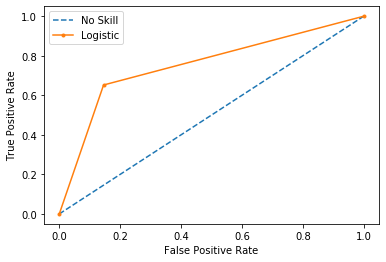

In [21]:
## Plotting the ROC curve
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_pred)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [22]:
# Using Grid Search CV to select the best parametres
param=[{'C':[1,0.02,0.04,0.01],'solver':['newton-cg', 'lbfgs', 'sag', 'saga'],'multi_class' :['auto', 'ovr', 'multinomial']},{
        'solver':['liblinear'],'multi_class': ['auto', 'ovr'] }]
grid_lr=GridSearchCV(estimator=cl_lr,param_grid=param,scoring='accuracy',cv=10)
grid_lr.fit(x,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=0.01, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='newton-cg',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 0.02, 0.04, 0.01],
                          'multi_class': ['auto', 'ovr', 'multinomial'],
                          'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
                         {'multi_class': ['auto', 'ovr'],
                          'solver': ['liblinear']}],
             pre_dispatch='2*n_jobs

In [23]:
# Displaying the best parameters
grid_lr.best_params_

{'C': 0.01, 'multi_class': 'auto', 'solver': 'newton-cg'}

### SVC

In [24]:
cl_sv=SVC(random_state=0,kernel='rbf',C=3,decision_function_shape='ovo',probability=True)
cl_sv.fit(x_train,y_train)
y_pred=cl_sv.predict(x_test)

In [25]:
# Prints the confusion Matrix
confusion_matrix(y_test,y_pred)

array([[101,   9],
       [ 23,  46]], dtype=int64)

In [26]:
# Prints the f1-Score
print(f1_score(y_test,y_pred))

0.7419354838709676


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.792


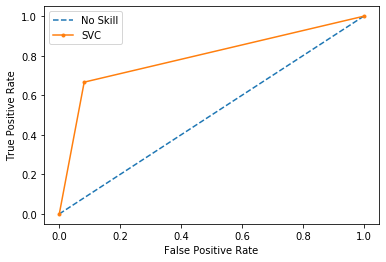

In [27]:
## Plotting the ROC curve
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_pred)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='SVC')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [28]:
# Using Grid Search CV to select the best parametres
param=[{'C':[1,2,3,4,5],'kernel':['rbf','linear'],'decision_function_shape' :['ovo', 'ovr'],'probability':[True,False]},
       {'C':[1,2,3,0.1],'kernel':['poly'],'degree':[3,4,5],'decision_function_shape' :['ovo', 'ovr'],'probability':[True,False]}]
grid_sv=GridSearchCV(estimator=cl_sv,param_grid=param,scoring='accuracy',cv=10)
grid_sv.fit(x,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=3, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovo', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=0, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 2, 3, 4, 5],
                          'decision_function_shape': ['ovo', 'ovr'],
                          'kernel': ['rbf', 'linear'],
                          'probability': [True, False]},
                         {'C': [1, 2, 3, 0.1],
                          'decision_function_shape': ['ovo', 'ovr'],
                          'degree': [3, 4, 5], 'kernel': ['poly'],
                          'probability': [True, False]}],
             pre_dispatch='2*n_jobs', refit=True, return_t

In [29]:
# Displays the best parameters
grid_sv.best_params_

{'C': 3,
 'decision_function_shape': 'ovo',
 'kernel': 'rbf',
 'probability': True}

### Random Forest Classifier

In [30]:
cl_rf=RandomForestClassifier(random_state=0,n_estimators=100,criterion='gini')
cl_rf.fit(x_train,y_train)
y_pred=cl_rf.predict(x_test)

In [31]:
# Prints the confusion Matrix
confusion_matrix(y_test,y_pred)

array([[99, 11],
       [20, 49]], dtype=int64)

In [32]:
# Prints the f1-Score
print(f1_score(y_test,y_pred))

0.7596899224806202


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.805


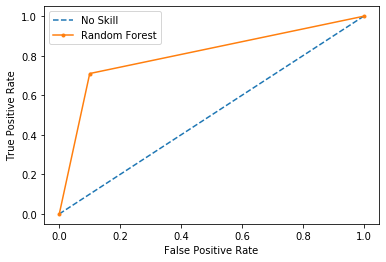

In [33]:
## Plotting the ROC curve
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_pred)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [34]:
# Using Grid Search CV to select the best parametres
param=[{'criterion':['gini','entropy'],'n_estimators':[90,100,200,400],}]
grid_rf=GridSearchCV(estimator=cl_rf,param_grid=param,scoring='accuracy',cv=10)
grid_rf.fit(x,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                  

In [35]:
# Displays the best parameters
grid_rf.best_params_

{'criterion': 'gini', 'n_estimators': 100}